# Aviation Accident Dataset

## Business Problem


Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Introduction

This project seeks to predict which aircraft is efficient and reliable for a company that is going into this business venture.

## Data Source and Exploration

This data comes from https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses which provides information about aviation accidents 

The findings of this project will be valuable to:

Aviation Division Executives,
Risk Management Team,
Regulatory and Safety Compliance Teams,
Investors and Financial Analysts.
These stakeholders will use the insights from this study to make strategic, financial, and operational decisions regarding the company’s aviation expansion.

This analysis provides you with critical insights into aircraft safety records, reliability, and operational risks.

### Loading Required Libraries 

In [59]:
# Importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [60]:
# Importing the file using a proper encoding

df = pd.read_csv('AviationData.csv', encoding='latin-1')

# Print the first five rows
df.head()

c:\Users\NOEL\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
# Print the last five rows

df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [ ]:
# Check the number of rows and columns in the dataset

df.shape

# There are 88889 entries and 31 columns

(88889, 31)

In [ ]:
# Provides us with the summary of the data(Characteristics of the DataFrame)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [138]:
# Summary statistics of numeric columns

df.describe()

,Number_Of_Engines,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Fatality
count,83491,72205,72740,78487,83196
mean,1,0,0,6,1
std,0,2,2,29,5
min,1,0,0,0,0
25%,1,0,0,0,0
50%,1,0,0,1,0
75%,1,0,0,2,0
max,8,161,380,699,349


## Data Cleaning

In [140]:
# List of data columns

df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Schedule', 'Purpose_Of_Flight', 'Air_Carrier',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date', 'Fatality'],
      dtype='object')

In [141]:
# Standardizing Column Names

df.columns = df.columns.str.title().str.replace(".", "_")

In [142]:
# Confirm the change in our Column Names

df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Schedule', 'Purpose_Of_Flight', 'Air_Carrier',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date', 'Fatality'],
      dtype='object')

In [143]:
# Check for duplicates

df.duplicated().value_counts()  # False means there are no Duplicates


False    84219
dtype: int64

In [144]:
# Convert date columns to datetime format

df['Event_Date'] = pd.to_datetime(df['Event_Date'], errors = 'coerce')
df['Publication_Date'] = pd.to_datetime(df['Publication_Date'], errors = 'coerce')

In [ ]:
# Check the Injury_Severity column

injury_severity = df["Injury_Severity"].value_counts()
injury_severity.head(20)

Non-Fatal      63878
Fatal(1)        6105
Fatal           4364
Fatal(2)        3686
Incident        2209
Fatal(3)        1122
Fatal(4)         803
Fatal(5)         234
Minor            176
Fatal(6)         158
Serious          135
Unavailable       93
Fatal(7)          55
Fatal(8)          51
Fatal(10)         32
Fatal(9)          18
Fatal(11)         10
Fatal(14)          9
Fatal(13)          8
Fatal(12)          7
Name: Injury_Severity, dtype: int64

`Injury_Severity` and `Total_Fatal_Injuries` has the  safe information but `Total.Fatal.Injuries` has many missing data compared to `Injury_Severity`. Created a new Fatality column with less missing numerical data than `Total_Fatal_Injuries` by combining the two Columns 

In [ ]:
# 'Fatality'  is the new column

df['Fatality'] = df['Injury_Severity'].str.extract(r'\((\d+)\)')

df['Fatality'].fillna(df['Injury_Severity'], inplace=True)

df['Fatality'].replace({'Non-Fatal': 0, 'Minor': 0, 'Serious': 0, 'Incident': 0}, inplace=True)

df.loc[df['Fatality'] == 'Fatal', 'Fatality'] = df.loc[df['Fatality'] == 'Fatal', 'Total_Fatal_Injuries']

df['Fatality'].replace('Unavailable', np.nan, inplace=True)

# Convert to integer, handling NaN values safely
df['Fatality'] = pd.to_numeric(df['Fatality'], errors='coerce')

# Set float format for better display
pd.options.display.float_format = '{:.0f}'.format


KeyError: 'Total_Fatal_Injuries'

In [ ]:
# The new column 'Fatality' is created

df['Fatality'].value_counts()

0      69998
1       8867
2       5172
3       1588
4       1103
       ...  
31         1
169        1
150        1
117        1
156        1
Name: Fatality, Length: 125, dtype: int64

In [ ]:
# Dropping the column 'Total_Fatal_Injuries'

df.drop(columns=['Total_Fatal_Injuries'], inplace=True)

In [ ]:
# Replace 'Unk' and 'UNK' with 'Unknown' for consistency

df['Weather_Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True, regex = False)

# Display the count of each unique weather condition after replacement 
df['Weather_Condition'].value_counts()

VMC        73420
IMC         5852
Unknown     1065
Name: Weather_Condition, dtype: int64

In [ ]:
# Check for missing values

df.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_Damage            3194
Aircraft_Category         56602
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_Of_Engines          6084
Engine_Type                7077
Far_Description           56866
Schedule                  76307
Purpose_Of_Flight          6192
Air_Carrier               72241
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_Phase_Of_Flight     27165
Report_Status              6381
Publication_Date          13771
Fatality                   1096
dtype: i

Filling missing values with `Unknown` and for `Number_Of_Engines` with the mean number of engines because it is numeric.

In [ ]:
# Fill the missing values with 'Unknown'

df['Aircraft_Category'].fillna( 'UNKNOWN' , inplace=True)
df['Aircraft_Category'].replace({ 'UNKNOWN' : 'Airplane' }, inplace=True)
df = df[df['Aircraft_Category'].str.contains("Airplane")==True]
df['Purpose_Of_Flight'].fillna( 'Unknown' , inplace=True)
df['Aircraft_Damage'].fillna( 'Unknown' , inplace=True)
df['Broad_Phase_Of_Flight'].fillna( 'UNKNOWN' , inplace=True)
df['Number_Of_Engines'].fillna(df['Number_Of_Engines'].mean(), inplace=True)

In [ ]:
# Count the occurrences of each aircraft manufacturer in the 'Make' column
make = df["Make"].value_counts()

# Display the top 20 most common aircraft manufacturers
make.head(20)

Cessna               22227
Piper                12029
CESSNA                4922
Beech                 4330
PIPER                 2841
Bell                  1799
Boeing                1593
BOEING                1149
Grumman               1094
Mooney                1092
BEECH                 1042
Bellanca               886
Hughes                 687
Robinson               667
Air Tractor            595
Schweizer              546
Mcdonnell Douglas      521
Aeronca                487
Maule                  445
Champion               428
Name: Make, dtype: int64

In [ ]:
# Standardize the 'Make' column by converting all text to title case  
# (e.g., 'CESSNA' and 'cessna' become 'Cessna')  

df['Make'] = df['Make'].str.title()

# Display the top 10 most common aircraft manufacturers
df['Make'].value_counts().nlargest(10)



Cessna         27149
Piper          14870
Beech           5372
Boeing          2742
Bell            1812
Mooney          1334
Grumman         1172
Bellanca        1045
Air Tractor      691
Hughes           688
Name: Make, dtype: int64

## Analysis

### Aircraft make and model

In [ ]:
# Count occurrences of each unique aircraft Make and Model combination
make_model = df[["Make", "Model"]].value_counts()

# Display the top 30 most common aircraft Make and Model combinations
make_model.head(30)

Make     Model     
Cessna   152           2366
         172           1753
         172N          1163
Piper    PA-28-140      932
Cessna   150            829
         172M           798
         172P           689
         182            659
         180            621
         150M           585
Piper    PA-18          578
         PA-28-180      572
         PA-18-150      571
         PA-28-161      565
         PA-28-181      529
Boeing   737            489
Piper    PA-38-112      468
Cessna   150L           460
Beech    A36            419
Cessna   140            401
         170B           389
         172S           371
Grumman  G-164A         365
Bell     206B           363
Piper    PA-32-300      356
Cessna   182P           355
Piper    PA-24-250      352
         PA-28R-200     334
         PA-12          324
Cessna   A188B          318
dtype: int64

### Aircraft make vs model vs injury severity

In [ ]:
# Count occurrences of each unique combination of Make, Model, and Injury Severity
injury_severity_per_make_model = df[["Make", "Model", "Injury_Severity"]].value_counts()

# Display the top 50 most common aircraft Make-Model combinations with their Injury Severity counts  
injury_severity_per_make_model.head(50)

Make     Model       Injury_Severity
Cessna   152         Non-Fatal          2093
         172         Non-Fatal          1517
         172N        Non-Fatal           949
Piper    PA-28-140   Non-Fatal           743
Cessna   150         Non-Fatal           731
         172M        Non-Fatal           655
         172P        Non-Fatal           579
         180         Non-Fatal           571
         182         Non-Fatal           539
Piper    PA-18       Non-Fatal           518
Cessna   150M        Non-Fatal           515
Piper    PA-18-150   Non-Fatal           498
         PA-28-161   Non-Fatal           452
         PA-28-180   Non-Fatal           428
         PA-38-112   Non-Fatal           404
         PA-28-181   Non-Fatal           387
Cessna   150L        Non-Fatal           376
         140         Non-Fatal           369
         170B        Non-Fatal           355
Grumman  G-164A      Non-Fatal           346
Cessna   172S        Non-Fatal           319
Bell     206B     

In [ ]:
# Count occurrences of each unique combination of Make, Model, and Aircraft Category
aircraft_make_model_category = df[["Make", "Model", "Aircraft_Category"]].value_counts()

# Display the top 50 most common aircraft Make-Model combinations with their Aircraft Category counts  
aircraft_make_model_category.head(50)

Make     Model       Aircraft_Category
Cessna   152         Airplane             2366
         172         Airplane             1753
         172N        Airplane             1163
Piper    PA-28-140   Airplane              932
Cessna   150         Airplane              829
         172M        Airplane              798
         172P        Airplane              689
         182         Airplane              659
         180         Airplane              621
         150M        Airplane              585
Piper    PA-18       Airplane              578
         PA-28-180   Airplane              572
         PA-18-150   Airplane              571
         PA-28-161   Airplane              565
         PA-28-181   Airplane              529
Boeing   737         Airplane              489
Piper    PA-38-112   Airplane              468
Cessna   150L        Airplane              460
Beech    A36         Airplane              419
Cessna   140         Airplane              401
         170B        

In [149]:
# Count occurrences of each unique combination of Make, Model, Aircraft Category, Number of Engines, and Engine Type  
aircraft_make_model_category_engine = df[["Make", "Model", "Aircraft_Category", "Number_Of_Engines", "Engine_Type"]].value_counts()


# Display the top 50 most common aircraft configurations
aircraft_make_model_category_engine.head(50)

Make     Model       Aircraft_Category  Number_Of_Engines  Engine_Type  
Cessna   152         Airplane           1                  Reciprocating    2318
         172         Airplane           1                  Reciprocating    1605
         172N        Airplane           1                  Reciprocating    1135
Piper    PA-28-140   Airplane           1                  Reciprocating     891
Cessna   150         Airplane           1                  Reciprocating     783
         172M        Airplane           1                  Reciprocating     772
         172P        Airplane           1                  Reciprocating     672
         180         Airplane           1                  Reciprocating     604
         182         Airplane           1                  Reciprocating     587
         150M        Airplane           1                  Reciprocating     580
Piper    PA-18       Airplane           1                  Reciprocating     563
         PA-28-180   Airplane       

In [ ]:
# Count occurrences of each unique combination of Make, Model, Aircraft Category, Number of Engines, Engine Type, and Investigation Type  
aircraft_investigation_type = df[["Make", "Model", "Aircraft_Category", "Number_Of_Engines", "Engine_Type", "Investigation_Type"]].value_counts()


# Display the top 50 most common aircraft configurations with their investigation type
aircraft_investigation_type.head(50)

Make     Model       Aircraft_Category  Number_Of_Engines  Engine_Type    Investigation_Type
Cessna   152         Airplane           1                  Reciprocating  Accident              2304
         172         Airplane           1                  Reciprocating  Accident              1602
         172N        Airplane           1                  Reciprocating  Accident              1132
Piper    PA-28-140   Airplane           1                  Reciprocating  Accident               888
Cessna   150         Airplane           1                  Reciprocating  Accident               778
         172M        Airplane           1                  Reciprocating  Accident               770
         172P        Airplane           1                  Reciprocating  Accident               668
         180         Airplane           1                  Reciprocating  Accident               604
         182         Airplane           1                  Reciprocating  Accident               58

In [ ]:
# Count occurrences of each unique combination of Make, Model, Number of Engines, Engine Type, Investigation Type, and Purpose of Flight
aircraft_investigation_type_flight = df[["Make", "Model", "Number_Of_Engines", "Engine_Type", "Investigation_Type", "Purpose_Of_Flight"]].value_counts()

# Display the top 50 most common aircraft configurations with their investigation types and purpose of flight
aircraft_investigation_type_flight.head(50)

Make      Model       Number_Of_Engines  Engine_Type    Investigation_Type  Purpose_Of_Flight 
Cessna    152         1                  Reciprocating  Accident            Instructional         1422
          172         1                  Reciprocating  Accident            Personal              1050
          152         1                  Reciprocating  Accident            Personal               804
          172N        1                  Reciprocating  Accident            Personal               697
Piper     PA-28-140   1                  Reciprocating  Accident            Personal               664
Cessna    172M        1                  Reciprocating  Accident            Personal               527
          180         1                  Reciprocating  Accident            Personal               509
          150         1                  Reciprocating  Accident            Personal               481
Piper     PA-28-180   1                  Reciprocating  Accident            Perso

In [ ]:
# Count occurrences of each unique Investigation Type
investigation_type = df["Investigation_Type"].value_counts()

# Display the top 50 most common Investigation Types
investigation_type.head(50)

Accident    80443
Incident     3776
Name: Investigation_Type, dtype: int64

In [ ]:
# Count occurrences of each unique Number_Of_Engines Type
engine_number = df["Number_Of_Engines"].value_counts()

# Display the top 50 most common Number_Of_Engines Types
engine_number.head(20)

1    66360
2    10840
1     5381
0      728
3      482
4      426
6        1
8        1
Name: Number_Of_Engines, dtype: int64

In [ ]:
# Count occurrences of each unique broad phase of flight
broad_phase_of_flight = df["Broad_Phase_Of_Flight"].value_counts()

# Display the top 50 most common phases of flight where accidents occurred
broad_phase_of_flight.head(50)

UNKNOWN        23465
Landing        15195
Takeoff        12352
Cruise         10117
Maneuvering     7895
Approach        6446
Climb           2018
Taxi            1942
Descent         1857
Go-around       1350
Standing         921
Unknown          546
Other            115
Name: Broad_Phase_Of_Flight, dtype: int64

In [ ]:
# Count occurrences of each combination of Investigation Type and Broad Phase of Flight
investigation_type_broad_phase_of_flight = df[["Investigation_Type", "Broad_Phase_Of_Flight"]].value_counts()

# Display the top 50 most common combination
investigation_type_broad_phase_of_flight.head(50)

Investigation_Type  Broad_Phase_Of_Flight
Accident            UNKNOWN                  21598
                    Landing                  14842
                    Takeoff                  11993
                    Cruise                    9754
                    Maneuvering               7861
                    Approach                  6239
Incident            UNKNOWN                   1867
Accident            Climb                     1834
                    Taxi                      1767
                    Descent                   1748
                    Go-around                 1335
                    Standing                   831
                    Unknown                    534
Incident            Cruise                     363
                    Takeoff                    359
                    Landing                    353
                    Approach                   207
                    Climb                      184
                    Taxi                

In [ ]:
# Count occurrences of each combination of Aircraft Make, Investigation Type, and Broad Phase of Flight
make_investigation_type_broad_phase_of_flight = df[["Make", "Investigation_Type", "Broad_Phase_Of_Flight"]].value_counts()

# Display the top 50 most common combinations
make_investigation_type_broad_phase_of_flight.head(50)

Make                Investigation_Type  Broad_Phase_Of_Flight
Cessna              Accident            Landing                  6407
                                        UNKNOWN                  6308
                                        Takeoff                  3825
Piper               Accident            UNKNOWN                  3664
Cessna              Accident            Cruise                   3396
Piper               Accident            Landing                  2732
                                        Takeoff                  2387
Cessna              Accident            Approach                 2108
Piper               Accident            Cruise                   2027
Cessna              Accident            Maneuvering              1804
Beech               Accident            UNKNOWN                  1351
Piper               Accident            Approach                 1245
                                        Maneuvering              1064
Boeing              Incident

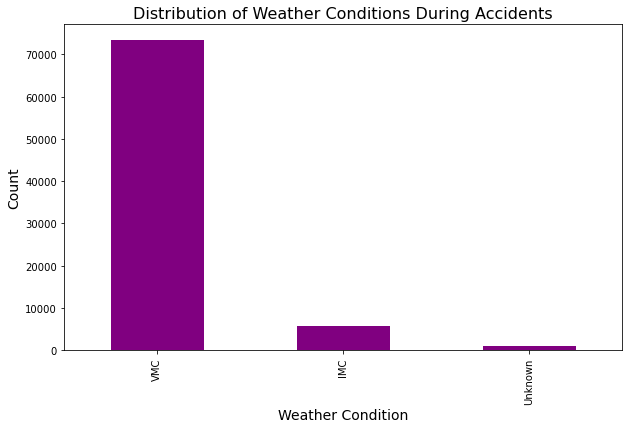

In [ ]:
# Plot the distribution of weather conditions
plt.figure(figsize=(10, 6))

df['Weather_Condition'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Weather Conditions During Accidents', fontsize=16)
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.show()

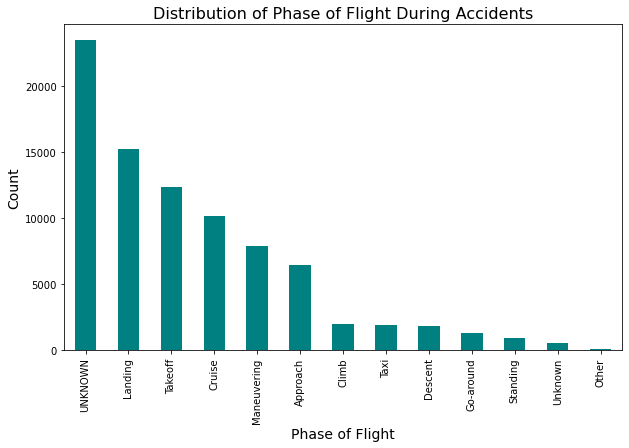

In [116]:
# Plot the distribution of phase of flight
plt.figure(figsize=(10, 6))
df['Broad_Phase_Of_Flight'].value_counts().plot(kind='bar', color='teal')
plt.title('Distribution of Phase of Flight During Accidents', fontsize=16)
plt.xlabel('Phase of Flight', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

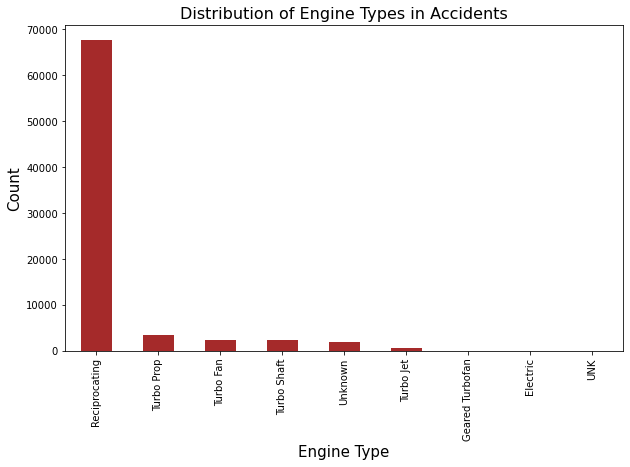

In [117]:
# Plot the distribution of engine types
plt.figure(figsize=(10, 6))
df['Engine_Type'].value_counts().plot(kind='bar', color='brown')
plt.title('Distribution of Engine Types in Accidents', fontsize=16)
plt.xlabel('Engine Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

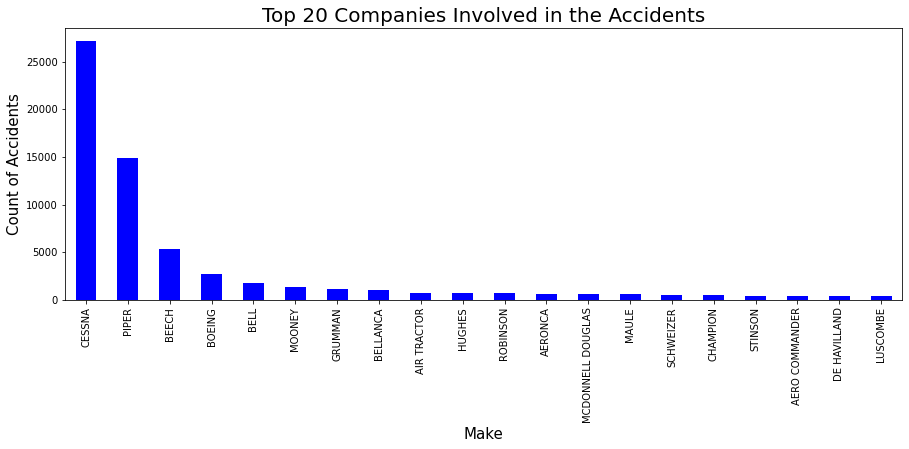

In [121]:
plt.figure(figsize=(15,5))
df['Make'].str.upper().value_counts().sort_values(ascending=False)[:20].plot(kind='bar', color='blue')
plt.xticks(rotation=90)
plt.xlabel("Make", size=15)
plt.ylabel("Count of Accidents", size=15)
plt.title("Top 20 Companies Involved in the Accidents", size=20)
y=df['Make'].str.upper().value_counts().sort_values(ascending=False)[:20]
plt.show()

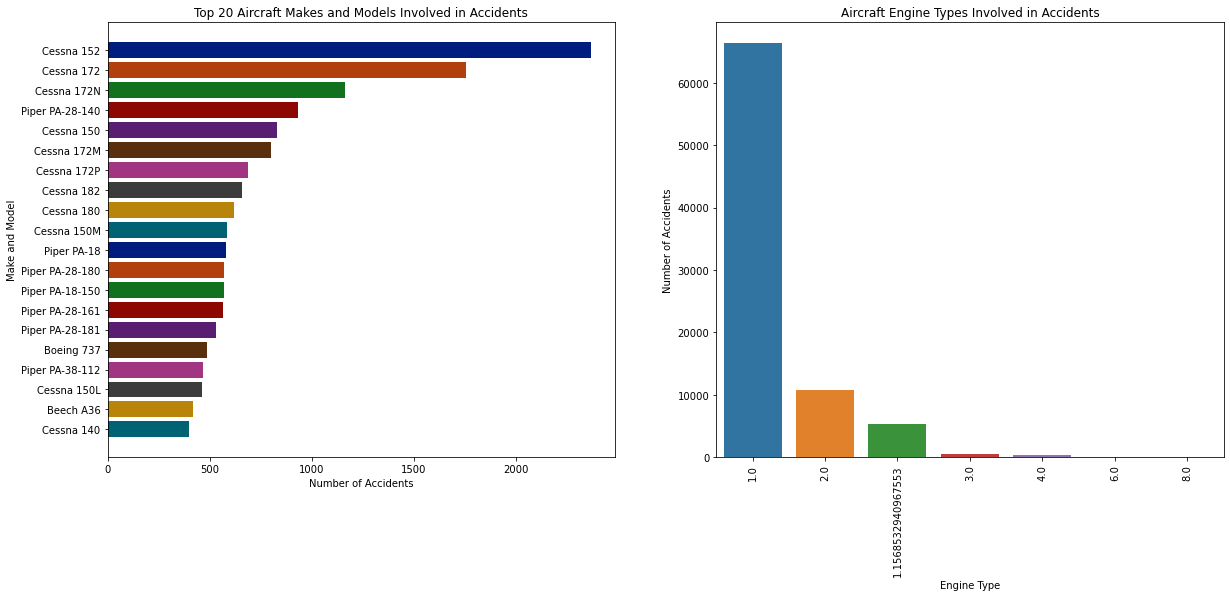

In [ ]:
# Create a figure and two axes (side-by-side) for subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Top 20 Aircraft Makes and Models Involved in Accidents
top_20_make_model = make_model_accident_counts.head(20)
colors = sns.color_palette("dark", len(top_20_make_model))
axes[0].barh(top_20_make_model['Make'] + ' ' + top_20_make_model['Model'], top_20_make_model['AccidentCount'], color=colors)
axes[0].set_xlabel('Number of Accidents')
axes[0].set_ylabel('Make and Model')
axes[0].set_title('Top 20 Aircraft Makes and Models Involved in Accidents')
axes[0].invert_yaxis()

# Set the title and labels with appropriate font sizes
sns.countplot(data=df, x='Number_Of_Engines', order=df['Number_Of_Engines'].value_counts().index, ax=axes[1])
axes[1].set_title('Aircraft Engine Types Involved in Accidents')
axes[1].set_ylabel('Number of Accidents')
axes[1].set_xlabel('Engine Type')
axes[1].tick_params(axis='x', rotation=90)

# Display the plot
plt.show()

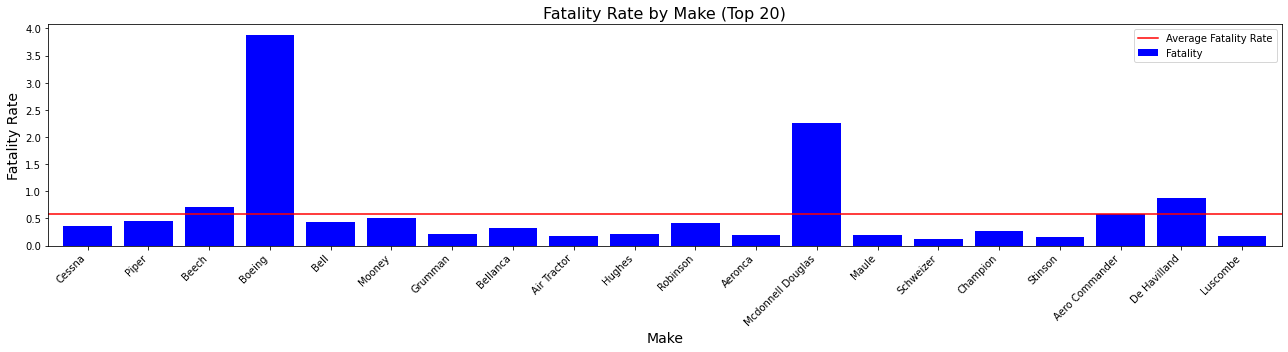

In [ ]:
make_top20 = df['Make'].value_counts().nlargest(20).index.tolist()

make_data = df[df['Make'].isin(make_top20)]

makefatal = make_data.groupby('Make')['Fatality'].mean().reindex(make_top20)

# average fatality rate across all makes
averagefatal = df['Fatality'].mean()

# plot
plt.figure(figsize=(18, 5))
makefatal.plot.bar(color='blue', width=0.8)

# horizontal line for the average fatality rate
plt.axhline(y=averagefatal, color='r', linestyle='-', label='Average Fatality Rate')

# Set the title and labels with appropriate font sizes
plt.title('Fatality Rate by Make (Top 20)', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Fatality Rate', fontsize=14)
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

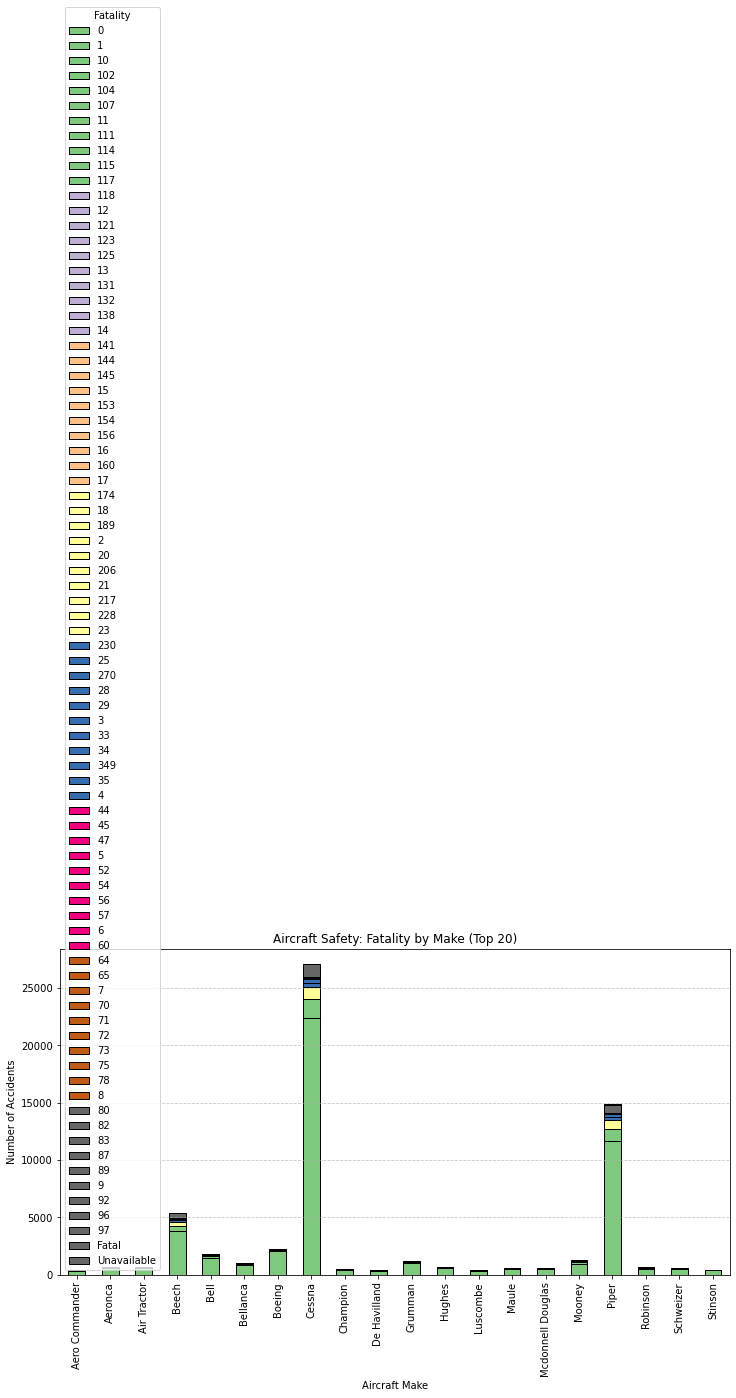

In [155]:
top_20_makes = df['Make'].value_counts().nlargest(20).index

df_top_20_makes = df[df['Make'].isin(top_20_makes)]

injury_by_make = df_top_20_makes.groupby(['Make', 'Fatality']).size().unstack()

injury_by_make.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Accent', edgecolor='black')

plt.xlabel("Aircraft Make")
plt.ylabel("Number of Accidents")
plt.title("Aircraft Safety: Fatality by Make (Top 20)")
plt.xticks(rotation=90)
plt.legend(title="Fatality")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the Plot
plt.show()


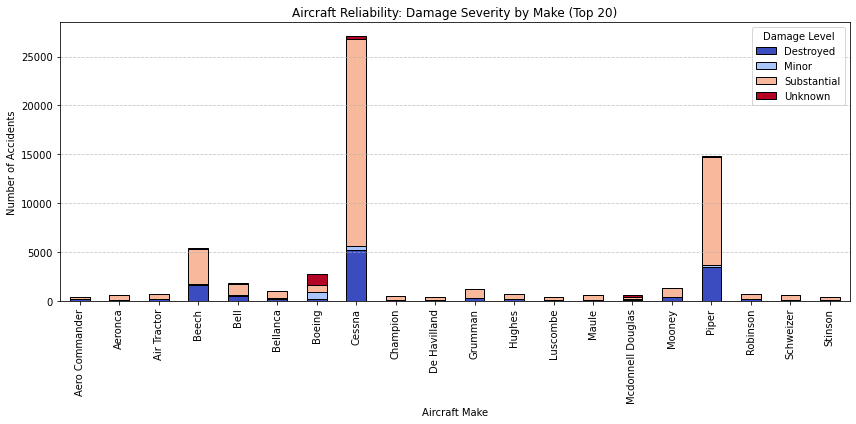

In [99]:
import matplotlib.pyplot as plt


top_20_makes = df['Make'].value_counts().nlargest(20).index

df_top_20_makes = df[df['Make'].isin(top_20_makes)]

damage_by_make = df_top_20_makes.groupby(['Make', 'Aircraft_Damage']).size().unstack()

damage_by_make.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm', edgecolor='black')


plt.xlabel("Aircraft Make")
plt.ylabel("Number of Accidents")
plt.title("Aircraft Reliability: Damage Severity by Make (Top 20)")
plt.xticks(rotation=90)
plt.legend(title="Damage Level")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


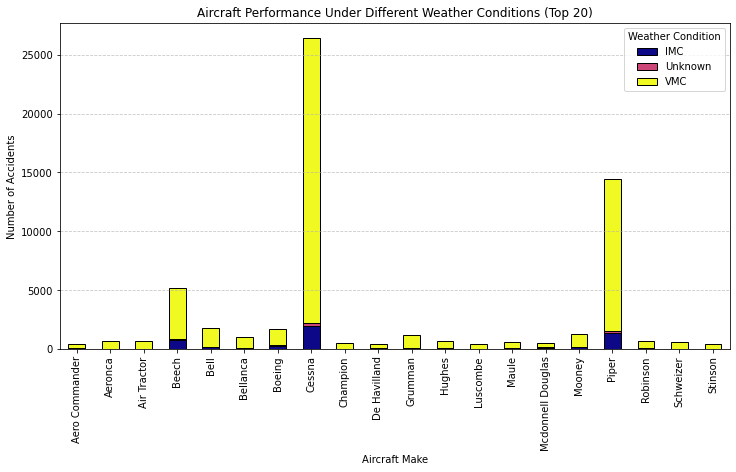

In [ ]:
import matplotlib.pyplot as plt


top_20_makes = df['Make'].value_counts().nlargest(20).index

df_top_20_makes = df[df['Make'].isin(top_20_makes)]

weather_by_make = df_top_20_makes.groupby(['Make', 'Weather_Condition']).size().unstack()

weather_by_make.plot(kind='bar', stacked=True, figsize=(12,6), colormap='plasma', edgecolor='black')

plt.xlabel("Aircraft Make")
plt.ylabel("Number of Accidents")
plt.title("Aircraft Performance Under Different Weather Conditions (Top 20)")
plt.xticks(rotation=90)
plt.legend(title="Weather Condition")
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Display the plot
plt.show()


Conclusions for the charts above:

3) Board phase of flight: unfortunately, a large number of incidents don’t have information about broad phases of flight, so leaving this aside, we see that the most dangerous flight phases, when accidents happen, are 1. landing, 2. takeoff, 3. cruise, 4. maneuvering, 5.approach. Although most accidents occurred during landing there are only 1,8% fatalities, while during maneuvering are 39% fatalities.

4) Amateur Built: most incidents involved planes that were not built by amateurs, but this is related to the fact that there are many more such planes in the world. Planes are manufactured in factories and airports cannot use planes whitch are build by amateurs because they are not safe. In disasters when planes had built by amateurs, more than 27% of the victims didn't survive, while when planes had built by amateurs, more than 17% of the victims didn't survive;

5) Number of Engines: planes with one engines more often have accidents and it's safer to choose fly a plane which has more than 2 engines;

6) Engine Type: planes with reciprocating engine more often have accidents;

7) Weather Condition: more accidents happen during VMC conditions. Although there are 15% fatalities, while IMC - 57% fatalities.(*VMC conditions describe the weather conditions and situations in which a pilot can sufficiently and safely maintain visuals of all other aircraft and the terrain around them. IMC conditions describe a situation in which visibility and the weather require the pilot to rely on their instruments, and thus conduct an IFR flight. This is typically done when flying through clouds, as well as general bad weather);

8) ‘Purpose of fly’: don't have impact on accidents, because it is obvious that more people fly for a personal purpose.